

---



# Data Science Test



---


#### Answers by **José Ananías Hilario Reyes**



---



Welcome to the Data Science Test. Your goal is to show us how solid you are at unravelling data related problems and designing solutions. This challenge has two parts, both are equally relevant. Please include all details you might consider necessary, in terms of code and documentation.



---

# Part 1: Theoretical Questions

###1) We are benchmarking two landing pages in our web client. Version A got 1000 new visitors of which 34 signed up and version B got 2000 new visitors of which 84 signed up. Which version performs better?

> We can look at this experiment as an instance of A/B testing. Assuming independent and identically distributed selection of subjects (iid assumption) we can compare the relative performance of both versions and evaluate the statistical significance of the results. We assume the null hypothesis to be that the versions A and B yield the same conversion rate.
>
> In this case we are interested in the Conversion Rate (CR) which indicates a user signing up for our site. We can assume that the CR follows a Binomial distribution $CR_i \sim B_i(n, p_i)$. We can estimate the probability of success by the Maximum Likelihood Estimation (MLE) as $\hat{p} = \frac{\sum_{i = 1}^{n} {y_i}}{n}$, where $y = 1$ if the user signed up, and $y = 0$ otherwise.
>
> We can write the contingency table of the A/B test, as follows:
>
>|   | A | B |  Row Total |
>|---|---|---|---|
>| Signed-up  | 34  | 84  | 118  |
>| Didn't sign up  | 966  | 1916  | 2882  |
>| Column Total  | 1000  | 2000  | 3000  |
>
>
> Let $a = 34, b = 84, c = 966, d = 1916.$ We have $n_A = a+c = 1000$ and $n_B = b+d = 2000.$ Then, we can estimate that $\hat{p_A} = \frac{a}{a+c} = \frac{34}{1000} = 0.034$ and $\hat{p_B} = \frac{b}{b+d} = \frac{84}{2000} = 0.042$. So, version A gives us an expected conversion rate of 3.4\%, while version B gives a conversion rate of 4.2\%. Based on this result we have that version B is an improvement over version A. In order to confirm this, we need to assess the statistical significance of the result, which addresses the issue of the inherent variability when dealing with samples from a population (i.e. whether the result is likely to be due to random variability or not). We need to make sure that our sample is big enough, and that the hypothesized improvement is not due to random variability. To this end we perform the Fisher Exact Test to obtain the p-value of the experiment, which indicates the probability of obtaining a result similar to the observation, under the assumption that the null hypothesis is correct. The calculation follows:
>
> 
>\begin{equation*}
    p-value = \frac{{a+b \choose a}{c+d \choose c}}{{n \choose a+c}} = \frac{(a+b)!(c+d)!(a+c)!(b+d)!}{a!b!c!d!n!} = \frac{118!2882!1000!2000!}{34!84!966!1916!3000!} = 0.3197
\end{equation*}
>
>A p-value of 31.97\% indicates that the result is not statistically significant, if we have a threshold of around 10\%, which is typical.
>
> With big sample sizes, as in cases like this, calculating the Fisher Exact Test may prove infeasible; then, we may perform a Z-test instead: we calculate both proportions, $\hat{p_A} = 0.034, \hat{p_B} = 0.042$, as well as the overall sample proportion $\hat{p_N} =  \frac{a+b}{a+b+c+d} = 0.0393$. We calculate the Z-score as follows:
>
> \begin{equation}
        Z = \frac{p_A - p_B}{\sqrt{p_N \cdot (1-p_N) \cdot (\frac{1}{n_A} + \frac{1}{n_B})}} = \frac{0.034-0.042}{0.0393(1-0.0393)(1/1000 + 1/2000)} = -1.063
\end{equation}
>
> If we choose a confidence level of 90\%, the reference Z-score is 1.645; for the difference to be statistically significant, we need that $|Z| < |Z_{\alpha/2}|$. Therefore, our results are not statistically significant according to the Z-test.

###2) Given the dataset (feature1, feature2, label) (-1, -1, 0), (-1, 1, 1), (1, -1, 1), (1, 1, 0), would you prefer to train a Logistic Regression or a Decision Tree Classifier for label prediction? Why?

> Let $\phi_1 \in \{-1, 1\}, \phi_2 \in \{-1, 1\}$, $f: \phi_1 \times \phi_2 \longrightarrow \{0, 1\}$. The function mapping observed in the data is analogous to the XOR logic operator (simply reparametrize the features as $\phi_i' \triangleq \frac{1}{2}(1 - \phi_i)$, then the dataset corresponds exactly to the XOR operator).
>
> This function is not linearly separable, so linear classifiers such as Logistic Regression would be unable to learn it, unless some feature engineering is performed (note that the decision boundary of logistic regression is linear w.r.t. its input, so it is considered a linear classifier even though its output is not linear). If we introduce the feature $\phi_{12} \triangleq \phi_1 \cdot \phi_2$, then we can learn the function exactly using Logistic Regression.
>
> A Decision Tree is able to learn the function exactly, as the following sequence of decisions, which occur at three nodes:
>
> 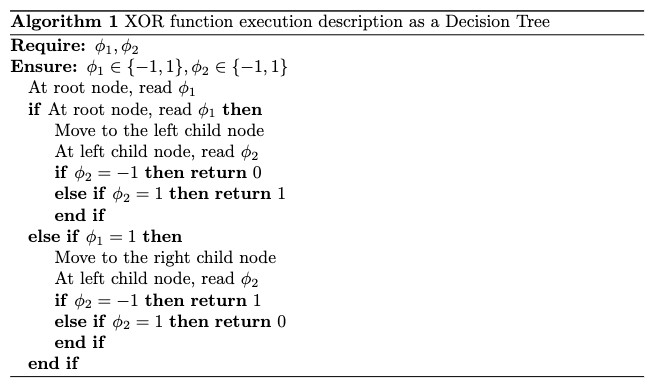

###3) The probability of a pet being a dog is 30%. The probability that a pet dog weighs more than 3 kg is 60%. If a pet is not a dog, the probability of it weighing less than or equal to 3 kg is 70%. What is the probability of a pet being a dog if it weighs more than 3 kg?

> Let the random variable $X$ indicate the kind of pet, and let the random variable $W$ indicate the weight of the pet. We have $p(X = \text{dog}) = 0.3,$ $p(W > \text{3 kg} \mid X = \text{dog}) = 0.6$ and $p(W \le \text{3 kg} \mid X \neq \text{dog}) = 0.7.$ We want to find $p(X = \text{dog} \mid W > \text{3 kg}).$
>
> The analysis follows.
>
>\begin{equation*}
    \tag{Bayes' Theorem}
    p(X \mid W) = \frac{p(W \mid X)p(X)}{p(W)}
\end{equation*}
>
> For the sake of readability, we will refer to the realizations of the random variables (i.e. $X = x$) with the observation itself $x$.
>
>\begin{equation*}
    p(w) = \sum_{x \in dom(X)} p(w \mid x)p(x)
\end{equation*}
>
>\begin{equation*}
    \begin{split}
    p(w > \text{3 kg}) &= p(w > \text{3 kg} \mid \text{dog})p(\text{dog}) + p(w > \text{3 kg} \mid \text{not dog})p(\text{not dog})\\
    p(w > \text{3 kg}) &= p(w > \text{3 kg} \mid \text{dog})p(\text{dog}) + (1-p(w \le \text{3 kg} \mid \text{not dog}))(1-p(\text{dog}))\\
    &= 0.6 \cdot 0.3 + (1-0.7) \cdot (1-0.3) = \boxed{0.39}
    \end{split}
\end{equation*}
>
> Then:
>
> \begin{equation*}
    \begin{split}
    p(\text{dog} \mid w > \text{3 kg}) &= \frac{p(w > \text{3 kg} \mid \text{dog})p(\text{dog})}{p(w > \text{3 kg})}\\
    &= \frac{(0.6) \cdot (0.3)}{0.39}\\
    p(\text{dog} \mid w > \text{3 kg}) &= \boxed{0.46}
    \end{split}
\end{equation*}

###4) We are solving a classification problem using a Decision Tree. When increasing the depth of the tree the accuracy improves until it stagnates at 90%. Why is this an unexpected behavior? Can you offer a plausible explanation?

> If we are talking about the training accuracy, this would be unexpected behavior because, unless we are using some regularization mechanism, the Decision Tree would be grown until overfitting the data, achieving 100% accuracy: the tree would continue to be expanded until all its leaf nodes would have zero impurity (i.e. all the points inside the leaf would correspond to the same label). A possible reason why the accuracy stagnates at 90\% is the use of a regularization mechanism; in the case of Decision Trees, one option is to limit the maximum depth the tree would be allowed to reach. Another option is to set a minimum leaf size which sets the limit against further splitting.
>
> Now, if we are talking about the test accuracy, this behavior is not unexpected since it relates to the generalization performance of the model. Moreover, note that Decision Trees are built greedily, which may result in a suboptimal solution even if there exists a perfect sequence of splits.

###5) What would you change in this Python line?

```
operationResult: str = 193;
```



> There are several things we can notice. The first and most important is the type mismatch: we assign a type hint indicating that the variable `operationResult` should be a string, yet we assign an integer as its default value. If we healthcheck this code using Mypy to verify the types, the code will fail. A second thing to point out is that this definition doesn't follow the PEP 8 style guidelines, which is considered the best practice in Python: variable names should be in `lowercase_underscore` format. Finally, semicolons to end statements are not conventional in Python, and are not necessary either; they are useful for compound statements, but the PEP 8 style guideline discourages this usage.


---

# Part 2: Experiment Design & Data Exploring

Retrieve the dataset [here](https://catalog.data.gov/dataset/2018-central-park-squirrel-census-squirrel-data) (also in data folder) and describe it to understand it first, then propose your approach and finally implement the analysis. Expose every issue you may find, it is not a code test (although we appreciate pretty coding) but a data exploring test, so do not forget to include results, observations and written decisions. Your conclusions need to be statistically grounded.

The output should show your line of thoughts and final ideas, so tell us a story! We expect to receive a notebook-like output with a huge amount of markdown, or any other similar format you would prefer.

## Task
In Central Park, NYC there are plenty of squirrels and they are tracked! We would like to know more about them and their behavior so:
- Make a sociological study about squirrels in Central Park in terms of how they interact between them and towards people. 
- Squirrels no jokin'. We suspect there are organized squirrel gangs (maybe dealing with nuts), can you confirm/deny this?
- Friends or foes. Is their friendliness random or related to specific factors?


## Solution

### Load data

In [ ]:
%%capture
!wget https://data.cityofnewyork.us/api/views/vfnx-vebw/rows.csv
!wget https://data.cityofnewyork.us/api/views/vfnx-vebw/rows.json

In [ ]:
import pandas as pd
import json
import numpy as np

In [ ]:
%%capture
df = pd.read_csv('rows.csv')

### Understand the data

#### Metadata

In [ ]:
df.columns

Index(['X', 'Y', 'Unique Squirrel ID', 'Hectare', 'Shift', 'Date',
       'Hectare Squirrel Number', 'Age', 'Primary Fur Color',
       'Highlight Fur Color', 'Combination of Primary and Highlight Color',
       'Color notes', 'Location', 'Above Ground Sighter Measurement',
       'Specific Location', 'Running', 'Chasing', 'Climbing', 'Eating',
       'Foraging', 'Other Activities', 'Kuks', 'Quaas', 'Moans', 'Tail flags',
       'Tail twitches', 'Approaches', 'Indifferent', 'Runs from',
       'Other Interactions', 'Lat/Long'],
      dtype='object')

In [ ]:
df.head(5)

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)


In [ ]:
df.describe()

,X,Y,Date,Hectare Squirrel Number
count,3023.000000,3023.000000,3.023000e+03,3023.000000
mean,-73.967184,40.780853,1.011949e+07,4.123718
std,0.007726,0.010285,4.246671e+04,3.096492
min,-73.981159,40.764911,1.006202e+07,1.000000
25%,-73.973102,40.771676,1.008202e+07,2.000000
50%,-73.968594,40.778166,1.012202e+07,3.000000
75%,-73.960189,40.791219,1.014202e+07,6.000000
max,-73.949722,40.800119,1.020202e+07,23.000000


In [ ]:
metadata = json.load(open('rows.json'))['meta']

In [ ]:
col_md = {col['name']: col['description'] for col in metadata['view']['columns'] if col['id'] > 0}

In [ ]:
for col in df.columns:
    print(f'{col}: {col_md[col]}')

X: Longitude coordinate for squirrel sighting point
Y: Latitude coordinate for squirrel sighting point
Unique Squirrel ID: Identification tag for each squirrel sightings. The tag is comprised of "Hectare ID" + "Shift" + "Date" + "Hectare Squirrel Number."
Hectare: ID tag, which is derived from the hectare grid used to divide and count the park area. One axis that runs predominantly north-to-south is numerical (1-42), and the axis that runs predominantly east-to-west is roman characters (A-I). 
Shift: Value is either "AM" or "PM," to communicate whether or not the sighting session occurred in the morning or late afternoon. 
Date: Concatenation of the sighting session day and month.
Hectare Squirrel Number: Number within the chronological sequence of squirrel sightings for a discrete sighting session. 
Age: Value is either "Adult" or "Juvenile."
Primary Fur Color: Value is either "Gray," "Cinnamon" or "Black."
Highlight Fur Color: Discrete value or string values comprised of "Gray," "Cin

We have several categories of information available in this dataset, according to its metadata:

- Time of Sighting: `Shift`, `Date`.
- Squirrel Location: `X`, `Y`, `Hectare`, `Hectare Squirrel Number`, `Location`, `Above Ground Sighter Measurement`, `Specific Location`, `Lat/Long`.
- Squirrel Identity: `Unique Squirrel ID`.
- Squirrel Features: `Age`, `Primary Fur Color`, `Highlight Fur Color`, `Combination of Primary and Highlight Color`, `Color notes`
- Squirrel Behavior: `Running`, `Chasing`, `Climbing`, `Eating`, `Foraging`, `Other Activities`.
- Squirrel Communication: `Kuks`, `Quaas`, `Moans`, `Tail flags`, `Tail twitches`.
- Squirrel Human Interaction: `Approaches`, `Indifferent`, `Runs from`, `Other Interactions`.

A first look at the data suggests the following useful independent and dependent variables:

- Independent: `X`, `Y`, `Hectare`, `Shift`, `Date`, `Hectare Squirrel Number`, `Age`, `Primary Fur Color`, `Highlight Fur Color`, `Location`, `Above Ground Sighter Measurement`, `Running`, `Chasing`, `Climbing`, `Eating`, `Foraging`.
- Dependent: `Kuks`, `Quaas`, `Moans`, `Tail flags`, `Tail twitches`, `Approaches`, `Indifferent`, `Runs from`.

#### Statistics and data schema

In [ ]:
%%capture
!pip install tensorflow-data-validation

In [ ]:
import tensorflow_data_validation as tfdv

In [ ]:
stats = tfdv.generate_statistics_from_csv(data_location='rows.csv')

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [ ]:
tfdv.visualize_statistics(stats)

In [ ]:
schema = tfdv.infer_schema(stats)

tfdv.display_schema(schema)

,Type,Presence,Valency,Domain
Feature name,,,,
'X',FLOAT,required,,-
'Y',FLOAT,required,,-
'Unique Squirrel ID',BYTES,required,,-
'Hectare',BYTES,required,,-
'Shift',STRING,required,,'Shift'
'Date',INT,required,,-
'Hectare Squirrel Number',INT,required,,-
'Age',STRING,optional,single,'Age'
'Primary Fur Color',STRING,optional,single,'Primary Fur Color'


,Values
Domain,
'Shift',"'AM', 'PM'"
'Age',"'?', 'Adult', 'Juvenile'"
'Primary Fur Color',"'Black', 'Cinnamon', 'Gray'"
'Highlight Fur Color',"'Black', 'Black, Cinnamon', 'Black, Cinnamon, White', 'Black, White', 'Cinnamon', 'Cinnamon, White', 'Gray', 'Gray, Black', 'Gray, White', 'White'"
'Combination of Primary and Highlight Color',"'+', 'Black+', 'Black+Cinnamon', 'Black+Cinnamon, White', 'Black+Gray', 'Black+Gray, White', 'Black+White', 'Cinnamon+', 'Cinnamon+Black', 'Cinnamon+Black, White', 'Cinnamon+Gray', 'Cinnamon+Gray, Black', 'Cinnamon+Gray, White', 'Cinnamon+White', 'Gray+', 'Gray+Black', 'Gray+Black, Cinnamon', 'Gray+Black, Cinnamon, White', 'Gray+Black, White', 'Gray+Cinnamon', 'Gray+Cinnamon, White', 'Gray+White'"
'Location',"'Above Ground', 'Ground Plane'"
'Above Ground Sighter Measurement',"'0', '1', '10', '100', '11', '12', '13', '14', '15', '16', '17', '18', '180', '19', '2', '20', '23', '24', '25', '28', '3', '30', '31', '33', '35', '4', '40', '43', '45', '5', '50', '55', '6', '60', '65', '7', '70', '8', '80', '9', 'FALSE'"


Observations:
1. Given that features `X` and `Y` seem to be stably bounded and without outliers, when using these features, we should consider normalizing their value for better performance of models using them, and to enhance interpretability of the feature itself. 
2. We may consider bucketing the timestamps found in the `Date` column. We may consider bucketing by fixed width, or by quantiles. In our particular case, we may be interested in co-occurring observations in the same area, so we may process rows corresponding to a given date range, and bucketing the observations taken in the given area, within the date range of interest.
3. We can see that the values for column `Hectare Squirrel Number` (or $HSN$) are monotonically decreasing. This is expected, as this column stores the count of squirrels seen per session, which means that $HSN_{i} >= HSN_{i+1}$ (i.e. whenever we have seen $x+1$ squirrels, we know for sure we have also seen $x$ squirrels).
4. According to the metadata, the column `Hectare` is used to discretize the locations in the park into squares. We may verify this assumption by visualizing the correlation between `X`, `Y` and `Hectare`. If this is indeed correct, we may analyze the data by `Hectare`, and use the `X`, `Y` features for finer-grained analysis.
5. Binary categorical columns can be used as-is.
6. A co-occurrence matrix computed from the categorical columns, may provide useful insights.
7. Free-language columns (`Color notes`, `Other Interactions`, `Other Activities`, `Specific Location`) may be used only as auxiliary information. These have the highest percentage of missing values.
8. `Highlight Fur Color` seems like could be useful but has around 35% missing values.

### Approach

In general: Verify expected patterns and search for unexpected patterns.
- Analyze slices of the data.
- Analyze covariation of variables.
- Analyze statistical significance of results.

In particular, to answer each question, a list of things to consider for analysis:

**Make a sociological study about squirrels in Central Park in terms of how they interact between them and towards people.**
- Consider observations restricted to a specific time period and place.
- Understand the role of `Age` in the squirrel behavior. We should expect a significant difference between young ones and older ones.
- Understand the role of `Shift` in squirrel behavior. It is likely that squirrels feed in one of the two; we would be able to verify this. Also, squirrels may present a more aggressive behavior depending on the time. The time may also condition their sociability towards humans and other squirrels.

**Squirrels no jokin'. We suspect there are organized squirrel gangs (maybe dealing with nuts), can you confirm/deny this?**
- Consider observations restricted to a specific time period and place.
- The features groups `Squirrel Communication` and `Squirrel Behavior` may prove to be essential for answering this question. One of the main factors of gangs is the cooperative activity, which inherently involves communication and behavior which is modulated by the communication.

**Friends or foes. Is their friendliness random or related to specific factors?**
- As mentioned above, `Age` and `Shift` may play a role.
- The appearance of the squirrels, we would hypothesize, bear no influence on their friendliness. It would be useful to verify this, however, since we could think that they may be friendlier to their own kind. Also, different appearance may indicate different subtypes of squirrel, and in this case we may see different levels of aggressiveness (and differences across behaviors and other characteristics, in general).

In [ ]:
max_p_value = 0.1

In [ ]:
df.columns

Index(['X', 'Y', 'Unique Squirrel ID', 'Hectare', 'Shift', 'Date',
       'Hectare Squirrel Number', 'Age', 'Primary Fur Color',
       'Highlight Fur Color', 'Combination of Primary and Highlight Color',
       'Color notes', 'Location', 'Above Ground Sighter Measurement',
       'Specific Location', 'Running', 'Chasing', 'Climbing', 'Eating',
       'Foraging', 'Other Activities', 'Kuks', 'Quaas', 'Moans', 'Tail flags',
       'Tail twitches', 'Approaches', 'Indifferent', 'Runs from',
       'Other Interactions', 'Lat/Long'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   X                                           3023 non-null   float64
 1   Y                                           3023 non-null   float64
 2   Unique Squirrel ID                          3023 non-null   object 
 3   Hectare                                     3023 non-null   object 
 4   Shift                                       3023 non-null   object 
 5   Date                                        3023 non-null   int64  
 6   Hectare Squirrel Number                     3023 non-null   int64  
 7   Age                                         2902 non-null   object 
 8   Primary Fur Color                           2968 non-null   object 
 9   Highlight Fur Color                         1937 non-null   object 
 10  Combination 

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%m%d%Y').values.astype(np.int64) // 10 ** 9

In [ ]:
df = df.drop(labels=['Unique Squirrel ID', 'Combination of Primary and Highlight Color', 'Color notes', 'Specific Location', 'Other Interactions', 'Other Activities', 'Lat/Long'], axis=1)

In [ ]:
for col in df.columns:
    if pd.api.types.is_bool_dtype(df[col]) or pd.api.types.is_object_dtype(df[col]):
        df[col] = df[col].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   X                                 3023 non-null   float64 
 1   Y                                 3023 non-null   float64 
 2   Hectare                           3023 non-null   category
 3   Shift                             3023 non-null   category
 4   Date                              3023 non-null   int64   
 5   Hectare Squirrel Number           3023 non-null   int64   
 6   Age                               2902 non-null   category
 7   Primary Fur Color                 2968 non-null   category
 8   Highlight Fur Color               1937 non-null   category
 9   Location                          2959 non-null   category
 10  Above Ground Sighter Measurement  2909 non-null   category
 11  Running                           3023 non-null   catego

In [ ]:
from scipy.stats import chi2_contingency
from IPython.display import display

In [ ]:
chi2_df = pd.DataFrame(columns=['col1', 'col2', 'chi2', 'p-value'])
cross_tables = dict()
for i, col1 in enumerate(df):
    if not pd.api.types.is_categorical_dtype(df[col1]):
        continue
    for col2 in df:
        if pd.api.types.is_categorical_dtype(df[col2]):
            cross = pd.crosstab(index=df[col2], columns=df[col1])
            cross_tables[(col1, col2, 'cross')] = cross
            chi2, p, _, expected = chi2_contingency(cross)
            cross_tables[(col1, col2, 'expected')] = expected
            chi2_df = chi2_df.append({'col1': col1, 'col2': col2, 'chi2': round(chi2, 4), 'p-value': round(p, 4)}, ignore_index=True)
chi2_df = chi2_df[chi2_df['p-value'] < max_p_value]

In [ ]:
pd.set_option('display.max_rows', None)
display(pd.pivot_table(chi2_df, index=['col1', 'col2']))

chi2  \
col1                             col2                                             
Above Ground Sighter Measurement Above Ground Sighter Measurement  1.163600e+05   
                                 Age                               1.909343e+02   
                                 Chasing                           6.772760e+01   
                                 Climbing                          1.147188e+03   
                                 Eating                            6.347610e+01   
                                 Foraging                          4.841774e+02   
                                 Hectare                           1.535723e+04   
                                 Indifferent                       6.359920e+01   
                                 Kuks                              1.199609e+02   
                                 Location                          2.909000e+03   
                                 Moans                             5.994080e+01   
                                 Quaas                             1.345098e+02   
                                 Runs from                         8.420070e+01   
                                 Shift                             8.496210e+01   
                                 Tail flags                        9.524380e+01   
                                 Tail twitches                     5.654520e+01   
Age                              Above Ground Sighter Measurement  1.909343e+02   
                                 Age                               5.804000e+03   
                                 Eating                            4.784500e+00   
                                 Foraging                          2.320450e+01   
                                 Hectare                           9.908702e+02   
                                 Indifferent                       4.702500e+00   
                                 Kuks                              7.888600e+00   
                                 Location                          2.159200e+01   
Approaches                       Approaches                        3.004981e+03   
                                 Chasing                           4.478700e+00   
                                 Climbing                          4.432200e+00   
                                 Eating                            1.500450e+01   
                                 Foraging                          8.646100e+00   
                                 Hectare                           4.415780e+02   
                                 Highlight Fur Color               2.230690e+01   
                                 Indifferent                       1.045239e+02   
                                 Location                          2.467990e+01   
                                 Primary Fur Color                 2.279140e+01   
                                 Runs from                         1.294270e+01   
                                 Tail twitches                     3.884900e+00   
Chasing                          Above Ground Sighter Measurement  6.772760e+01   
                                 Approaches                        4.478700e+00   
                                 Chasing                           3.011075e+03   
                                 Climbing                          4.057700e+00   
                                 Eating                            3.297190e+01   
                                 Foraging                          9.619230e+01   
                                 Hectare                           4.578333e+02   
                                 Kuks                              9.999000e+00   
                                 Location                          9.658100e+00   
                                 Quaas                             2.372180e+01   
                                 Runs from                         1.105930e+01   
        

#### Identified predictors

After the results yielded by the $\chi^2$-test, we have reason to believe the following outstanding dependencies exist:

---

##### Age

---



- The `Age` is a predictor for squirrel behavior (`Eating`, `Foraging` and `Indifferent`), squirrel communication activity (`Kuks`) and location (`Hectare` and `Location`).


In [ ]:
for col in ['Eating', 'Foraging', 'Indifferent', 'Kuks', 'Location']:
    cross = cross_tables['Age', col, 'cross']
    display(cross/cross.sum(axis=0))

Age,?,Adult,Juvenile
Eating,,,
False,1.0,0.753115,0.706061
True,0.0,0.246885,0.293939


Age,?,Adult,Juvenile
Foraging,,,
False,0.75,0.504283,0.642424
True,0.25,0.495717,0.357576


Age,?,Adult,Juvenile
Indifferent,,,
False,0.75,0.50662,0.563636
True,0.25,0.49338,0.436364


Age,?,Adult,Juvenile
Kuks,,,
False,0.75,0.970405,0.957576
True,0.25,0.029595,0.042424


Age,?,Adult,Juvenile
Location,,,
Above Ground,0.75,0.267539,0.377301
Ground Plane,0.25,0.732461,0.622699


- `Juvenile` squirrels are more likely to expose themselves when they are eating.
- `Adult` squirrels are more likely to expose themselves when foraging. This seems reasonable: adult squirrels might be more bold when it comes to visiting a broader range of places when looking for food.
- `Adult` squirrels are more likely to be indifferent towards humans, than `Juvenile` ones. This seems reasonable: younger squirrels can be expected to be more curious, playful and naive, than older ones.
- `Juvenile` squirrels are more likely to sound the `Kuks` alarm.
- `Juvenile` squirrels are more likely to be spotted above the ground. `Adult` squirrels are more likely to be spotted on the ground level, probably due to their increased boldness.

In [ ]:
for col in ['Hectare']:
    cross = cross_tables['Age', col, 'cross']
    norm = cross/cross.sum(axis=0)
    display(norm.sort_values(by='Adult', ascending=False).head(10))
    display(norm.sort_values(by='Juvenile', ascending=False).head(10))
    diff = abs(norm['Adult'] - norm['Juvenile']).sort_values(ascending=False).head(10)
    display(norm.loc[diff.index])

Age,?,Adult,Juvenile
Hectare,,,
14D,0.0,0.012072,0.003030
32E,0.0,0.011682,0.000000
14E,0.0,0.010514,0.003030
07H,0.0,0.010125,0.000000
13D,0.0,0.009346,0.003030
13E,0.0,0.008567,0.006061
08I,0.0,0.008178,0.000000
02C,0.0,0.008178,0.000000
30B,0.0,0.008178,0.000000


Age,?,Adult,Juvenile
Hectare,,,
09B,0.0,0.002726,0.033333
03B,0.0,0.004673,0.027273
09A,0.0,0.002336,0.024242
21B,0.0,0.001558,0.021212
04C,0.0,0.005841,0.021212
22C,0.0,0.003505,0.021212
03F,0.0,0.005841,0.018182
08A,0.0,0.001168,0.018182
18C,0.0,0.001168,0.018182


Age,?,Adult,Juvenile
Hectare,,,
09B,0.0,0.002726,0.033333
03B,0.0,0.004673,0.027273
09A,0.0,0.002336,0.024242
21B,0.0,0.001558,0.021212
22C,0.0,0.003505,0.021212
18C,0.0,0.001168,0.018182
08A,0.0,0.001168,0.018182
04C,0.0,0.005841,0.021212
20C,0.0,0.001558,0.015152


- Regarding `Hectare`, overall we can note that younger and older squirrels tend to frequent different places, though some tendencies are preserved. We have more samples for older squirrels, which accounts for missing observations; regardless, we can observe that some locations are preferred by younger squirrels, such as `01B`, `01D`, `01I`, `03B`, `03F`, `04C`, `06D`, `08A`, `08C`, `09A`, `10H`, `16E`, `18C`, `21B`, `22C`, `32A`, `34E`. The places with the biggest difference in proportions of sightings (i.e. `09B`, `03B`, `09A`, `21B`...) were typically the ones also the most visited by `Juvenile` squirrels. This seems to hint to some gangs, maybe related to nuts...



---

##### Shift

---

- The `Shift` is a predictor for squirrel behavior (`Climbing`, `Eating`, `Foraging` and `Indifferent`), and for type of squirrel spotted (`Highlight Fur Color`).



In [ ]:
for col in ['Climbing', 'Eating', 'Foraging', 'Highlight Fur Color', 'Indifferent']:
    cross = cross_tables['Shift', col, 'cross']
    display(cross/cross.sum(axis=0))

Shift,AM,PM
Climbing,,
False,0.747587,0.810263
True,0.252413,0.189737


Shift,AM,PM
Eating,,
False,0.780252,0.72315
True,0.219748,0.27685


Shift,AM,PM
Foraging,,
False,0.553823,0.502387
True,0.446177,0.497613


Shift,AM,PM
Highlight Fur Color,,
Black,0.029091,0.008993
"Black, Cinnamon",0.006061,0.003597
"Black, Cinnamon, White",0.006061,0.024281
"Black, White",0.002424,0.007194
Cinnamon,0.421818,0.376799
"Cinnamon, White",0.139394,0.137590
Gray,0.098182,0.080036
"Gray, Black",0.000000,0.002698
"Gray, White",0.019394,0.038669


Shift,AM,PM
Indifferent,,
False,0.461024,0.565632
True,0.538976,0.434368


- In the evening we are more likely to see squirrels involved in activity related to eating (e.g. `Foraging`, `Eating`) and less likely to see them involved in `Climbing`.
- Squirrels of `Black` higlight fur color are much more likely to be spotted in the morning than during the afternoon. On the other hand `Black, Cinnamon, White` squirrels are more likely to be spotted in the afternoon.
- In the morning, squirrels are more likely to be `Indifferent`.

In [ ]:
for col in ['Hectare']:
    cross = cross_tables['Shift', col, 'cross']
    norm = cross/cross.sum(axis=0)
    display(norm.sort_values(by='AM', ascending=False).head(10))
    display(norm.sort_values(by='PM', ascending=False).head(10))
    diff = abs(norm['AM'] - norm['PM']).sort_values(ascending=False).head(10)
    display(norm.loc[diff.index])

Shift,AM,PM
Hectare,,
14E,0.017075,0.002983
07F,0.012621,0.001790
01B,0.012621,0.005967
07H,0.011878,0.005967
14D,0.011878,0.009547
07B,0.011136,0.000000
03F,0.010393,0.004177
32E,0.010393,0.009547
13E,0.009651,0.006563


Shift,AM,PM
Hectare,,
04C,0.003712,0.010143
14D,0.011878,0.009547
32E,0.010393,0.009547
12F,0.004454,0.008950
20F,0.002227,0.008353
04D,0.002970,0.008353
03D,0.005939,0.008353
13D,0.008166,0.008353
32C,0.004454,0.007757


Shift,AM,PM
Hectare,,
14E,0.017075,0.002983
07B,0.011136,0.000000
07F,0.012621,0.001790
21A,0.006682,0.000000
01B,0.012621,0.005967
38G,0.000000,0.006563
09A,0.008909,0.002387
04C,0.003712,0.010143
17E,0.008166,0.001790


- Some locations are visited more frequently during the day than during the night, and viceversa.



---

##### Primary Fur Color

---

- The `Primary Fur Color` is a predictor for squirrel location (`Hectare`), squirrel behavior (`Approaches`), squirrel features (`Highlight Fur Color`) and squirrel communication behavior (`Quaas`, `Tail twitches`).

In [ ]:
for col in ['Approaches', 'Highlight Fur Color', 'Quaas', 'Tail twitches']:
    cross = cross_tables['Primary Fur Color', col, 'cross']
    display(cross/cross.sum(axis=0))

Primary Fur Color,Black,Cinnamon,Gray
Approaches,,,
False,0.941748,0.887755,0.94905
True,0.058252,0.112245,0.05095


Primary Fur Color,Black,Cinnamon,Gray
Highlight Fur Color,,,
Black,0.000000,0.030303,0.015209
"Black, Cinnamon",0.000000,0.000000,0.005703
"Black, Cinnamon, White",0.000000,0.000000,0.020279
"Black, White",0.000000,0.009091,0.004436
Cinnamon,0.517241,0.000000,0.476553
"Cinnamon, White",0.103448,0.000000,0.167934
Gray,0.275862,0.490909,0.000000
"Gray, Black",0.000000,0.009091,0.000000
"Gray, White",0.034483,0.175758,0.000000


Primary Fur Color,Black,Cinnamon,Gray
Quaas,,,
False,0.951456,0.987245,0.985847
True,0.048544,0.012755,0.014153


Primary Fur Color,Black,Cinnamon,Gray
Tail twitches,,,
False,0.825243,0.808673,0.863324
True,0.174757,0.191327,0.136676


- We can see clear evidence that squirrels with `Cinnamon` `Primary Fur Color` tend to be more friendly towards humans (as indicated by their `Approaches` behavior).
- We can see clear evidence that squirrels with `Black` `Primary Fur Color` tend perform the `Quaas` signal more than the cinnamon or gray ones, by around a factor of 3.5 (as indicated by their `Approaches` behavior).
- Squirrels with `Cinnamon` `Primary Fur Color` are the most likely to perform `Tail twitches`, then the `Black` ones, and finally the `Gray` ones are the least likely to perform them.  

In [ ]:
for col in ['Hectare']:
    cross = cross_tables['Primary Fur Color', col, 'cross']
    norm = cross/cross.sum(axis=0)
    display(norm.sort_values(by='Black', ascending=False).head(5))
    display(norm.sort_values(by='Cinnamon', ascending=False).head(5))
    display(norm.sort_values(by='Gray', ascending=False).head(5))

Primary Fur Color,Black,Cinnamon,Gray
Hectare,,,
33D,0.077670,0.000000,0.001617
33E,0.067961,0.000000,0.006066
32E,0.038835,0.000000,0.010514
28D,0.038835,0.007653,0.000404
10F,0.029126,0.000000,0.004852


Primary Fur Color,Black,Cinnamon,Gray
Hectare,,,
04D,0.0,0.035714,0.001617
03D,0.0,0.030612,0.004044
05C,0.0,0.025510,0.004044
01C,0.0,0.022959,0.001213
21F,0.0,0.020408,0.001213


Primary Fur Color,Black,Cinnamon,Gray
Hectare,,,
14D,0.000000,0.000000,0.012940
14E,0.000000,0.000000,0.011322
32E,0.038835,0.000000,0.010514
13D,0.000000,0.005102,0.009300
07H,0.009709,0.005102,0.009300


- Different kinds of squirrels (by their `Primary Fur Color`) seem to be distributed unequally, location-wise.



---

##### Highlight Fur Color

---

- The `Highlight Fur Color` is a predictor for squirrel location (`Hectare`), squirrel time of sighting (`Shift`), squirrel behavior (`Approaches`, `Eating`, `Foraging`,`Indifferent`, `Runs from`), squirrel features (`Primary Fur Color`) and squirrel communication behavior (`Tail flags`, `Tail twitches`).

In [ ]:
df.groupby('Highlight Fur Color').X.count()

Highlight Fur Color
Black                      34
Black, Cinnamon             9
Black, Cinnamon, White     32
Black, White               10
Cinnamon                  767
Cinnamon, White           268
Gray                      170
Gray, Black                 3
Gray, White                59
White                     585
Name: X, dtype: int64

- We had already seen above in the section **Understand the data**, in **Statistics and data schema**, that this column has a high rate of missing values (35.92%), so we have to take our comparisons with a grain of salt, even though co-dependencies have been identified. Considering this, we will inspect below not only the proportions but also the amount of incidences in given observations.

In [ ]:
for col in ['Approaches', 'Eating', 'Quaas', 'Foraging', 'Indifferent', 'Runs from', 'Tail twitches']:
    cross = cross_tables['Highlight Fur Color', col, 'cross']
    display(cross)
    display(cross/cross.sum(axis=0))

Highlight Fur Color,Black,"Black, Cinnamon","Black, Cinnamon, White","Black, White",Cinnamon,"Cinnamon, White",Gray,"Gray, Black","Gray, White",White
Approaches,,,,,,,,,,
False,32,9,29,10,714,239,152,2,51,558
True,2,0,3,0,53,29,18,1,8,27


Highlight Fur Color,Black,"Black, Cinnamon","Black, Cinnamon, White","Black, White",Cinnamon,"Cinnamon, White",Gray,"Gray, Black","Gray, White",White
Approaches,,,,,,,,,,
False,0.941176,1.0,0.90625,1.0,0.9309,0.891791,0.894118,0.666667,0.864407,0.953846
True,0.058824,0.0,0.09375,0.0,0.0691,0.108209,0.105882,0.333333,0.135593,0.046154


Highlight Fur Color,Black,"Black, Cinnamon","Black, Cinnamon, White","Black, White",Cinnamon,"Cinnamon, White",Gray,"Gray, Black","Gray, White",White
Eating,,,,,,,,,,
False,30,6,15,7,560,165,125,2,32,441
True,4,3,17,3,207,103,45,1,27,144


Highlight Fur Color,Black,"Black, Cinnamon","Black, Cinnamon, White","Black, White",Cinnamon,"Cinnamon, White",Gray,"Gray, Black","Gray, White",White
Eating,,,,,,,,,,
False,0.882353,0.666667,0.46875,0.7,0.730117,0.615672,0.735294,0.666667,0.542373,0.753846
True,0.117647,0.333333,0.53125,0.3,0.269883,0.384328,0.264706,0.333333,0.457627,0.246154


Highlight Fur Color,Black,"Black, Cinnamon","Black, Cinnamon, White","Black, White",Cinnamon,"Cinnamon, White",Gray,"Gray, Black","Gray, White",White
Quaas,,,,,,,,,,
False,34,9,32,10,752,267,167,3,59,577
True,0,0,0,0,15,1,3,0,0,8


Highlight Fur Color,Black,"Black, Cinnamon","Black, Cinnamon, White","Black, White",Cinnamon,"Cinnamon, White",Gray,"Gray, Black","Gray, White",White
Quaas,,,,,,,,,,
False,1.0,1.0,1.0,1.0,0.980443,0.996269,0.982353,1.0,1.0,0.986325
True,0.0,0.0,0.0,0.0,0.019557,0.003731,0.017647,0.0,0.0,0.013675


Highlight Fur Color,Black,"Black, Cinnamon","Black, Cinnamon, White","Black, White",Cinnamon,"Cinnamon, White",Gray,"Gray, Black","Gray, White",White
Foraging,,,,,,,,,,
False,18,6,19,3,374,107,85,1,23,301
True,16,3,13,7,393,161,85,2,36,284


Highlight Fur Color,Black,"Black, Cinnamon","Black, Cinnamon, White","Black, White",Cinnamon,"Cinnamon, White",Gray,"Gray, Black","Gray, White",White
Foraging,,,,,,,,,,
False,0.529412,0.666667,0.59375,0.3,0.487614,0.399254,0.5,0.333333,0.389831,0.51453
True,0.470588,0.333333,0.40625,0.7,0.512386,0.600746,0.5,0.666667,0.610169,0.48547


Highlight Fur Color,Black,"Black, Cinnamon","Black, Cinnamon, White","Black, White",Cinnamon,"Cinnamon, White",Gray,"Gray, Black","Gray, White",White
Indifferent,,,,,,,,,,
False,14,3,20,1,398,109,92,1,30,303
True,20,6,12,9,369,159,78,2,29,282


Highlight Fur Color,Black,"Black, Cinnamon","Black, Cinnamon, White","Black, White",Cinnamon,"Cinnamon, White",Gray,"Gray, Black","Gray, White",White
Indifferent,,,,,,,,,,
False,0.411765,0.333333,0.625,0.1,0.518905,0.406716,0.541176,0.333333,0.508475,0.517949
True,0.588235,0.666667,0.375,0.9,0.481095,0.593284,0.458824,0.666667,0.491525,0.482051


Highlight Fur Color,Black,"Black, Cinnamon","Black, Cinnamon, White","Black, White",Cinnamon,"Cinnamon, White",Gray,"Gray, Black","Gray, White",White
Runs from,,,,,,,,,,
False,29,6,18,10,577,213,129,3,44,458
True,5,3,14,0,190,55,41,0,15,127


Highlight Fur Color,Black,"Black, Cinnamon","Black, Cinnamon, White","Black, White",Cinnamon,"Cinnamon, White",Gray,"Gray, Black","Gray, White",White
Runs from,,,,,,,,,,
False,0.852941,0.666667,0.5625,1.0,0.752282,0.794776,0.758824,1.0,0.745763,0.782906
True,0.147059,0.333333,0.4375,0.0,0.247718,0.205224,0.241176,0.0,0.254237,0.217094


Highlight Fur Color,Black,"Black, Cinnamon","Black, Cinnamon, White","Black, White",Cinnamon,"Cinnamon, White",Gray,"Gray, Black","Gray, White",White
Tail twitches,,,,,,,,,,
False,27,4,20,9,658,216,133,2,50,479
True,7,5,12,1,109,52,37,1,9,106


Highlight Fur Color,Black,"Black, Cinnamon","Black, Cinnamon, White","Black, White",Cinnamon,"Cinnamon, White",Gray,"Gray, Black","Gray, White",White
Tail twitches,,,,,,,,,,
False,0.794118,0.444444,0.625,0.9,0.857888,0.80597,0.782353,0.666667,0.847458,0.818803
True,0.205882,0.555556,0.375,0.1,0.142112,0.19403,0.217647,0.333333,0.152542,0.181197


Let us consider the strength (i.e. confidence) of the detected relationship as a function of the likelihood of the classes being compared, and as a function of the sample sizes. Then:

- We have **clear indication** that squirrels with `White` `Highlight Fur Color` are less likely to approach a human than `Cinnamon, White`, `Gray` or `Cinnamon` ones.

- We have **clear indication** that squirrels with `Cinnamon, White` and `Gray, White` `Highlight Fur Color` are more likely to be spotted while `Eating` than `Cinnamon`, `White` or `Gray` ones.

- We have **clear indication** that squirrels with `Cinnamon, White` `Highlight Fur Color` are more likely to be spotted `Foraging` than `Cinnamon`, `White` or `Black` ones.

- We have **clear indication** that squirrels with `Cinnamon, White` `Highlight Fur Color` are less likely to be spotted `Indifferent` than `Cinnamon`, `White` or `Gray` ones.

- We have **moderate indication** that squirrels with `Black` `Highlight Fur Color` are less likely to be spotted `Indifferent` than `Cinnamon`, `White` or `Gray` ones.

- We have **moderate indication** that squirrels with `Black, Cinnamon, White` `Highlight Fur Color` are more likely to run away (i.e. `Runs from`) than `Black`, `Cinnamon`, `Cinnamon, White`, `Gray`, `Gray, White`, `White` ones.

- We have **moderate indication** that squirrels with `Black` `Highlight Fur Color` are less likely to run away (i.e. `Runs from`) than `Black`, `Cinnamon`, `Cinnamon, White`, `Gray`, `Gray, White`, `White` ones.


- We have **clear indication** that squirrels with `Cinnamon, White` `Highlight Fur Color` are more likely to do `Tail twitching` than `Cinnamon`, `White` or `Gray` ones. This is a sign of curiosity and interest.


---

##### Approaches

---

- Our results indicate that columns such as `Eating`, `Foraging`, `Primary Fur Color` and `Highlight Fur Color` could be seen as predictors for `Approaches`. At the same time, actions such as `Chasing`, `Climbing`, `Indifferent` and `Runs from` tend to occurr together with `Approaches`. `Location` and `Hectare` also seem to be important predictors for `Approaches`.

In [ ]:
for col in ['Eating', 'Foraging', 'Primary Fur Color', 'Highlight Fur Color', 'Chasing', 'Climbing', 'Indifferent', 'Runs from']:
    cross = cross_tables['Approaches', col, 'cross'].transpose()
    display(cross)
    display(cross/cross.sum(axis=0))

Eating,False,True
Approaches,,
False,2152,693
True,111,67


Eating,False,True
Approaches,,
False,0.95095,0.911842
True,0.04905,0.088158


Foraging,False,True
Approaches,,
False,1514,1331
True,74,104


Foraging,False,True
Approaches,,
False,0.953401,0.927526
True,0.046599,0.072474


Primary Fur Color,Black,Cinnamon,Gray
Approaches,,,
False,97,348,2347
True,6,44,126


Primary Fur Color,Black,Cinnamon,Gray
Approaches,,,
False,0.941748,0.887755,0.94905
True,0.058252,0.112245,0.05095


Highlight Fur Color,Black,"Black, Cinnamon","Black, Cinnamon, White","Black, White",Cinnamon,"Cinnamon, White",Gray,"Gray, Black","Gray, White",White
Approaches,,,,,,,,,,
False,32,9,29,10,714,239,152,2,51,558
True,2,0,3,0,53,29,18,1,8,27


Highlight Fur Color,Black,"Black, Cinnamon","Black, Cinnamon, White","Black, White",Cinnamon,"Cinnamon, White",Gray,"Gray, Black","Gray, White",White
Approaches,,,,,,,,,,
False,0.941176,1.0,0.90625,1.0,0.9309,0.891791,0.894118,0.666667,0.864407,0.953846
True,0.058824,0.0,0.09375,0.0,0.0691,0.108209,0.105882,0.333333,0.135593,0.046154


Chasing,False,True
Approaches,,
False,2574,271
True,170,8


Chasing,False,True
Approaches,,
False,0.938047,0.971326
True,0.061953,0.028674


Climbing,False,True
Approaches,,
False,2214,631
True,151,27


Climbing,False,True
Approaches,,
False,0.936152,0.958967
True,0.063848,0.041033


Indifferent,False,True
Approaches,,
False,1410,1435
True,159,19


Indifferent,False,True
Approaches,,
False,0.898662,0.986933
True,0.101338,0.013067


Runs from,False,True
Approaches,,
False,2187,658
True,158,20


Runs from,False,True
Approaches,,
False,0.932623,0.970501
True,0.067377,0.029499


- We can see that it is almost twice as likely that a squirrel will approach a human when she is `Eating` than when she is not.
- We can see that it is almost twice as likely that a squirrel will approach a human when she is `Foraging`, looking for food, than when she is not.
- `Cinnamon` (primary fur) squirrels are twice as likely to approach a human than those of other colors.
- When a squirrel is engaged in some other activity (e.g. `Chasing` or `Climbing`), she is about half as likely to approach a human than when she is not engaged in this activity.
- There's a visible correlation between `Indifferent`, `Runs from` and `Approaches`. We can understand this: typically, an indifferent squirrel by definition will not pay attention to the person, and a squirrel who runs from the person will not approach her. We can assume these three columns are (roughly) mutually exclusive.



#### Identifying squirrel gangs

- We have seen above several interesting facts that we can use to find about squirrel gangs.

- We have seen that `Juvenile` squirrels are suspisciously overrepresented in certain locations, which might hint at such locations being gang neighborhoods. This wouldn't be strange: we know that in certain animals, as they get older (in most cases it happens with males the most), they become less social and more territorial.

- Also, we may see a difference in sociability accross types of squirrel (by primary/highlight fur color).

- We will use `Hectare` most visited locations as pivot to identify potential squirrel gangs. We expect that such gang-member squirrels dealing with nuts will be seen `Foraging`.

- Squirrels involved in illegal activity may become frightened with humans (e.g. `Runs from`, `Kuks`).

- We should examine `Other interactions` and `Other Activities` for potential specific information concerning gang-like behavior.

In [ ]:
!pip install pyclustering

In [ ]:
df = pd.read_csv('rows.csv')

In [ ]:
from pyclustering.cluster.xmeans import xmeans

- Cluster by `X`, `Y` coordinates and `Date`.

In [ ]:
filtered_df = df[['X', 'Y', 'Date']]
normalized_df = ((filtered_df - filtered_df.min(axis=0))/(filtered_df.max(axis=0) - filtered_df.min(axis=0)))
normalized_df.describe()

,X,Y,Date
count,3023.000000,3023.000000,3023.000000
mean,0.444534,0.452806,0.410496
std,0.245773,0.292129,0.303334
min,0.000000,0.000000,0.000000
25%,0.256279,0.192157,0.142857
50%,0.399676,0.376483,0.428571
75%,0.667054,0.747218,0.571429
max,1.000000,1.000000,1.000000


In [ ]:
xmeans_instance = xmeans(data=normalized_df, init_centers=None, ccore=True, repeat=300)
xmeans_instance.process()
clust_ctrs = xmeans_instance.get_centers()
clust_ctrs

[[0.09380384561748445, 0.1134298554557, 0.3056722689075626],
 [0.30417185303762384, 0.17217392616001423, 0.28354978354978366],
 [0.1867667175005353, 0.13544108069051786, 0.06483226535996987],
 [0.37760342714163425, 0.302615768857157, 0.08810450250138974],
 [0.39376461313663663, 0.3575190131443231, 0.28571428571428603],
 [0.5225115841540963, 0.5835515838280582, 0.10246598639455777],
 [0.2749553382410391, 0.3490725840880789, 0.5427295918367343],
 [0.3228058015933048, 0.15073948808858342, 0.5059523809523808],
 [0.45269998576250114, 0.3421095018780919, 0.5008116883116881],
 [0.12606392087972065, 0.1597216021991473, 0.4967320261437909],
 [0.317430887720302, 0.2957121446095133, 0.8510822510822522],
 [0.10410481115659505, 0.15161638778516112, 0.8174603174603176],
 [0.040603883146705315, 0.08493383779276825, 0.9285714285714285],
 [0.1966763566192204, 0.14914968032407933, 1.0],
 [0.7727355175375875, 0.7859638884008017, 0.06297709923664119],
 [0.7345352415346834, 0.8476658602777285, 0.4839400428

In [ ]:
clusters = xmeans_instance.get_clusters()
[len(clusters[i]) for i in range(len(clusters))]

[136,
 66,
 379,
 257,
 53,
 168,
 112,
 132,
 88,
 153,
 165,
 27,
 19,
 31,
 262,
 467,
 139,
 80,
 109,
 180]

In [ ]:
post_df = df[[
    'Age', 'Primary Fur Color', 'Foraging', 'Running', 'Chasing',
     'Tail flags', 'Tail twitches', 'Eating'
]]
stats_df = pd.DataFrame()
for i, cluster in enumerate(clusters):
    n = len(cluster)
    current_df = post_df.iloc[cluster, :]
    prop_adult = len(current_df[current_df['Age'] == 'Adult'])/n
    prop_black = len(current_df[current_df['Primary Fur Color'] == 'Black'])/n
    prop_gray = len(current_df[current_df['Primary Fur Color'] == 'Gray'])/n
    prop_cinnamon = len(current_df[current_df['Primary Fur Color'] == 'Cinnamon'])/n
    prop_foraging = len(current_df[current_df['Foraging'] == True])/n
    prop_running = len(current_df[current_df['Running'] == True])/n
    prop_chasing = len(current_df[current_df['Chasing'] == True])/n
    prop_tf = len(current_df[current_df['Tail flags'] == True])/n
    prop_tt = len(current_df[current_df['Tail twitches'] == True])/n
    prop_eating = len(current_df[current_df['Eating'] == True])/n
    stats_df = stats_df.append({
        'Cluster': i, 'Adult': prop_adult, 'Eating': prop_eating,
        'Foraging': prop_foraging, 'Running': prop_running, 'Chasing': prop_chasing,
        'Tail flags': prop_tf, 'Tail twitches': prop_tt, 'Gray': prop_gray,
        'Cinnamon': prop_cinnamon, 'Black': prop_black
    }, ignore_index=True)
stats_df

,Cluster,Adult,Eating,Foraging,Running,Chasing,Tail flags,Tail twitches,Gray,Cinnamon,Black
0,0.0,0.838235,0.330882,0.477941,0.264706,0.110294,0.044118,0.139706,0.735294,0.242647,0.007353
1,1.0,0.924242,0.303030,0.545455,0.287879,0.060606,0.000000,0.212121,0.681818,0.257576,0.030303
2,2.0,0.891821,0.245383,0.440633,0.229551,0.092348,0.055409,0.155673,0.799472,0.145119,0.042216
3,3.0,0.844358,0.303502,0.474708,0.167315,0.116732,0.077821,0.105058,0.817121,0.151751,0.007782
4,4.0,0.943396,0.283019,0.584906,0.188679,0.037736,0.018868,0.113208,0.943396,0.056604,0.000000
5,5.0,0.845238,0.285714,0.392857,0.202381,0.053571,0.107143,0.154762,0.851190,0.130952,0.011905
6,6.0,0.875000,0.258929,0.625000,0.133929,0.125000,0.026786,0.133929,0.928571,0.044643,0.026786
7,7.0,0.909091,0.287879,0.507576,0.219697,0.045455,0.045455,0.166667,0.750000,0.143939,0.090909
8,8.0,0.931818,0.386364,0.511364,0.329545,0.045455,0.022727,0.113636,0.840909,0.147727,0.000000
9,9.0,0.784314,0.248366,0.496732,0.294118,0.104575,0.071895,0.156863,0.673203,0.287582,0.006536


In [ ]:
for col in stats_df.columns:
    if col in ['Cluster']:
        continue
    display(stats_df.sort_values(col, ascending=False).head(5))
    display(stats_df.sort_values(col, ascending=True).head(5))

,Cluster,Adult,Eating,Foraging,Running,Chasing,Tail flags,Tail twitches,Gray,Cinnamon,Black
11,11.0,0.962963,0.296296,0.666667,0.148148,0.185185,0.000000,0.000000,0.814815,0.185185,0.000000
4,4.0,0.943396,0.283019,0.584906,0.188679,0.037736,0.018868,0.113208,0.943396,0.056604,0.000000
17,17.0,0.937500,0.362500,0.600000,0.175000,0.037500,0.025000,0.137500,0.837500,0.037500,0.125000
8,8.0,0.931818,0.386364,0.511364,0.329545,0.045455,0.022727,0.113636,0.840909,0.147727,0.000000
1,1.0,0.924242,0.303030,0.545455,0.287879,0.060606,0.000000,0.212121,0.681818,0.257576,0.030303


,Cluster,Adult,Eating,Foraging,Running,Chasing,Tail flags,Tail twitches,Gray,Cinnamon,Black
12,12.0,0.631579,0.263158,0.210526,0.263158,0.105263,0.157895,0.052632,0.894737,0.105263,0.000000
19,19.0,0.700000,0.216667,0.322222,0.305556,0.133333,0.033333,0.150000,0.800000,0.172222,0.022222
9,9.0,0.784314,0.248366,0.496732,0.294118,0.104575,0.071895,0.156863,0.673203,0.287582,0.006536
15,15.0,0.811563,0.203426,0.498929,0.271949,0.092077,0.042827,0.113490,0.856531,0.087794,0.036403
16,16.0,0.812950,0.179856,0.482014,0.330935,0.100719,0.107914,0.165468,0.856115,0.093525,0.014388


,Cluster,Adult,Eating,Foraging,Running,Chasing,Tail flags,Tail twitches,Gray,Cinnamon,Black
8,8.0,0.931818,0.386364,0.511364,0.329545,0.045455,0.022727,0.113636,0.840909,0.147727,0.000000
17,17.0,0.937500,0.362500,0.600000,0.175000,0.037500,0.025000,0.137500,0.837500,0.037500,0.125000
0,0.0,0.838235,0.330882,0.477941,0.264706,0.110294,0.044118,0.139706,0.735294,0.242647,0.007353
3,3.0,0.844358,0.303502,0.474708,0.167315,0.116732,0.077821,0.105058,0.817121,0.151751,0.007782
1,1.0,0.924242,0.303030,0.545455,0.287879,0.060606,0.000000,0.212121,0.681818,0.257576,0.030303


,Cluster,Adult,Eating,Foraging,Running,Chasing,Tail flags,Tail twitches,Gray,Cinnamon,Black
13,13.0,0.870968,0.129032,0.483871,0.064516,0.161290,0.000000,0.096774,0.838710,0.096774,0.000000
16,16.0,0.812950,0.179856,0.482014,0.330935,0.100719,0.107914,0.165468,0.856115,0.093525,0.014388
18,18.0,0.825688,0.183486,0.513761,0.211009,0.174312,0.091743,0.211009,0.825688,0.119266,0.045872
14,14.0,0.862595,0.202290,0.423664,0.240458,0.061069,0.030534,0.175573,0.816794,0.072519,0.068702
15,15.0,0.811563,0.203426,0.498929,0.271949,0.092077,0.042827,0.113490,0.856531,0.087794,0.036403


,Cluster,Adult,Eating,Foraging,Running,Chasing,Tail flags,Tail twitches,Gray,Cinnamon,Black
11,11.0,0.962963,0.296296,0.666667,0.148148,0.185185,0.000000,0.000000,0.814815,0.185185,0.000000
6,6.0,0.875000,0.258929,0.625000,0.133929,0.125000,0.026786,0.133929,0.928571,0.044643,0.026786
17,17.0,0.937500,0.362500,0.600000,0.175000,0.037500,0.025000,0.137500,0.837500,0.037500,0.125000
4,4.0,0.943396,0.283019,0.584906,0.188679,0.037736,0.018868,0.113208,0.943396,0.056604,0.000000
1,1.0,0.924242,0.303030,0.545455,0.287879,0.060606,0.000000,0.212121,0.681818,0.257576,0.030303


,Cluster,Adult,Eating,Foraging,Running,Chasing,Tail flags,Tail twitches,Gray,Cinnamon,Black
12,12.0,0.631579,0.263158,0.210526,0.263158,0.105263,0.157895,0.052632,0.894737,0.105263,0.000000
19,19.0,0.700000,0.216667,0.322222,0.305556,0.133333,0.033333,0.150000,0.800000,0.172222,0.022222
5,5.0,0.845238,0.285714,0.392857,0.202381,0.053571,0.107143,0.154762,0.851190,0.130952,0.011905
14,14.0,0.862595,0.202290,0.423664,0.240458,0.061069,0.030534,0.175573,0.816794,0.072519,0.068702
2,2.0,0.891821,0.245383,0.440633,0.229551,0.092348,0.055409,0.155673,0.799472,0.145119,0.042216


,Cluster,Adult,Eating,Foraging,Running,Chasing,Tail flags,Tail twitches,Gray,Cinnamon,Black
16,16.0,0.812950,0.179856,0.482014,0.330935,0.100719,0.107914,0.165468,0.856115,0.093525,0.014388
8,8.0,0.931818,0.386364,0.511364,0.329545,0.045455,0.022727,0.113636,0.840909,0.147727,0.000000
19,19.0,0.700000,0.216667,0.322222,0.305556,0.133333,0.033333,0.150000,0.800000,0.172222,0.022222
9,9.0,0.784314,0.248366,0.496732,0.294118,0.104575,0.071895,0.156863,0.673203,0.287582,0.006536
1,1.0,0.924242,0.303030,0.545455,0.287879,0.060606,0.000000,0.212121,0.681818,0.257576,0.030303


,Cluster,Adult,Eating,Foraging,Running,Chasing,Tail flags,Tail twitches,Gray,Cinnamon,Black
13,13.0,0.870968,0.129032,0.483871,0.064516,0.161290,0.000000,0.096774,0.838710,0.096774,0.000000
6,6.0,0.875000,0.258929,0.625000,0.133929,0.125000,0.026786,0.133929,0.928571,0.044643,0.026786
11,11.0,0.962963,0.296296,0.666667,0.148148,0.185185,0.000000,0.000000,0.814815,0.185185,0.000000
3,3.0,0.844358,0.303502,0.474708,0.167315,0.116732,0.077821,0.105058,0.817121,0.151751,0.007782
17,17.0,0.937500,0.362500,0.600000,0.175000,0.037500,0.025000,0.137500,0.837500,0.037500,0.125000


,Cluster,Adult,Eating,Foraging,Running,Chasing,Tail flags,Tail twitches,Gray,Cinnamon,Black
11,11.0,0.962963,0.296296,0.666667,0.148148,0.185185,0.000000,0.000000,0.814815,0.185185,0.000000
18,18.0,0.825688,0.183486,0.513761,0.211009,0.174312,0.091743,0.211009,0.825688,0.119266,0.045872
13,13.0,0.870968,0.129032,0.483871,0.064516,0.161290,0.000000,0.096774,0.838710,0.096774,0.000000
19,19.0,0.700000,0.216667,0.322222,0.305556,0.133333,0.033333,0.150000,0.800000,0.172222,0.022222
6,6.0,0.875000,0.258929,0.625000,0.133929,0.125000,0.026786,0.133929,0.928571,0.044643,0.026786


,Cluster,Adult,Eating,Foraging,Running,Chasing,Tail flags,Tail twitches,Gray,Cinnamon,Black
17,17.0,0.937500,0.362500,0.600000,0.175000,0.037500,0.025000,0.137500,0.837500,0.037500,0.125000
4,4.0,0.943396,0.283019,0.584906,0.188679,0.037736,0.018868,0.113208,0.943396,0.056604,0.000000
7,7.0,0.909091,0.287879,0.507576,0.219697,0.045455,0.045455,0.166667,0.750000,0.143939,0.090909
8,8.0,0.931818,0.386364,0.511364,0.329545,0.045455,0.022727,0.113636,0.840909,0.147727,0.000000
5,5.0,0.845238,0.285714,0.392857,0.202381,0.053571,0.107143,0.154762,0.851190,0.130952,0.011905


,Cluster,Adult,Eating,Foraging,Running,Chasing,Tail flags,Tail twitches,Gray,Cinnamon,Black
12,12.0,0.631579,0.263158,0.210526,0.263158,0.105263,0.157895,0.052632,0.894737,0.105263,0.000000
16,16.0,0.812950,0.179856,0.482014,0.330935,0.100719,0.107914,0.165468,0.856115,0.093525,0.014388
5,5.0,0.845238,0.285714,0.392857,0.202381,0.053571,0.107143,0.154762,0.851190,0.130952,0.011905
18,18.0,0.825688,0.183486,0.513761,0.211009,0.174312,0.091743,0.211009,0.825688,0.119266,0.045872
3,3.0,0.844358,0.303502,0.474708,0.167315,0.116732,0.077821,0.105058,0.817121,0.151751,0.007782


,Cluster,Adult,Eating,Foraging,Running,Chasing,Tail flags,Tail twitches,Gray,Cinnamon,Black
1,1.0,0.924242,0.303030,0.545455,0.287879,0.060606,0.000000,0.212121,0.681818,0.257576,0.030303
13,13.0,0.870968,0.129032,0.483871,0.064516,0.161290,0.000000,0.096774,0.838710,0.096774,0.000000
11,11.0,0.962963,0.296296,0.666667,0.148148,0.185185,0.000000,0.000000,0.814815,0.185185,0.000000
10,10.0,0.921212,0.266667,0.484848,0.266667,0.078788,0.018182,0.151515,0.866667,0.072727,0.048485
4,4.0,0.943396,0.283019,0.584906,0.188679,0.037736,0.018868,0.113208,0.943396,0.056604,0.000000


,Cluster,Adult,Eating,Foraging,Running,Chasing,Tail flags,Tail twitches,Gray,Cinnamon,Black
1,1.0,0.924242,0.303030,0.545455,0.287879,0.060606,0.000000,0.212121,0.681818,0.257576,0.030303
18,18.0,0.825688,0.183486,0.513761,0.211009,0.174312,0.091743,0.211009,0.825688,0.119266,0.045872
14,14.0,0.862595,0.202290,0.423664,0.240458,0.061069,0.030534,0.175573,0.816794,0.072519,0.068702
7,7.0,0.909091,0.287879,0.507576,0.219697,0.045455,0.045455,0.166667,0.750000,0.143939,0.090909
16,16.0,0.812950,0.179856,0.482014,0.330935,0.100719,0.107914,0.165468,0.856115,0.093525,0.014388


,Cluster,Adult,Eating,Foraging,Running,Chasing,Tail flags,Tail twitches,Gray,Cinnamon,Black
11,11.0,0.962963,0.296296,0.666667,0.148148,0.185185,0.000000,0.000000,0.814815,0.185185,0.000000
12,12.0,0.631579,0.263158,0.210526,0.263158,0.105263,0.157895,0.052632,0.894737,0.105263,0.000000
13,13.0,0.870968,0.129032,0.483871,0.064516,0.161290,0.000000,0.096774,0.838710,0.096774,0.000000
3,3.0,0.844358,0.303502,0.474708,0.167315,0.116732,0.077821,0.105058,0.817121,0.151751,0.007782
4,4.0,0.943396,0.283019,0.584906,0.188679,0.037736,0.018868,0.113208,0.943396,0.056604,0.000000


,Cluster,Adult,Eating,Foraging,Running,Chasing,Tail flags,Tail twitches,Gray,Cinnamon,Black
4,4.0,0.943396,0.283019,0.584906,0.188679,0.037736,0.018868,0.113208,0.943396,0.056604,0.000000
6,6.0,0.875000,0.258929,0.625000,0.133929,0.125000,0.026786,0.133929,0.928571,0.044643,0.026786
12,12.0,0.631579,0.263158,0.210526,0.263158,0.105263,0.157895,0.052632,0.894737,0.105263,0.000000
10,10.0,0.921212,0.266667,0.484848,0.266667,0.078788,0.018182,0.151515,0.866667,0.072727,0.048485
15,15.0,0.811563,0.203426,0.498929,0.271949,0.092077,0.042827,0.113490,0.856531,0.087794,0.036403


,Cluster,Adult,Eating,Foraging,Running,Chasing,Tail flags,Tail twitches,Gray,Cinnamon,Black
9,9.0,0.784314,0.248366,0.496732,0.294118,0.104575,0.071895,0.156863,0.673203,0.287582,0.006536
1,1.0,0.924242,0.303030,0.545455,0.287879,0.060606,0.000000,0.212121,0.681818,0.257576,0.030303
0,0.0,0.838235,0.330882,0.477941,0.264706,0.110294,0.044118,0.139706,0.735294,0.242647,0.007353
7,7.0,0.909091,0.287879,0.507576,0.219697,0.045455,0.045455,0.166667,0.750000,0.143939,0.090909
2,2.0,0.891821,0.245383,0.440633,0.229551,0.092348,0.055409,0.155673,0.799472,0.145119,0.042216


,Cluster,Adult,Eating,Foraging,Running,Chasing,Tail flags,Tail twitches,Gray,Cinnamon,Black
9,9.0,0.784314,0.248366,0.496732,0.294118,0.104575,0.071895,0.156863,0.673203,0.287582,0.006536
1,1.0,0.924242,0.303030,0.545455,0.287879,0.060606,0.000000,0.212121,0.681818,0.257576,0.030303
0,0.0,0.838235,0.330882,0.477941,0.264706,0.110294,0.044118,0.139706,0.735294,0.242647,0.007353
11,11.0,0.962963,0.296296,0.666667,0.148148,0.185185,0.000000,0.000000,0.814815,0.185185,0.000000
19,19.0,0.700000,0.216667,0.322222,0.305556,0.133333,0.033333,0.150000,0.800000,0.172222,0.022222


,Cluster,Adult,Eating,Foraging,Running,Chasing,Tail flags,Tail twitches,Gray,Cinnamon,Black
17,17.0,0.937500,0.362500,0.600000,0.175000,0.037500,0.025000,0.137500,0.837500,0.037500,0.125000
6,6.0,0.875000,0.258929,0.625000,0.133929,0.125000,0.026786,0.133929,0.928571,0.044643,0.026786
4,4.0,0.943396,0.283019,0.584906,0.188679,0.037736,0.018868,0.113208,0.943396,0.056604,0.000000
14,14.0,0.862595,0.202290,0.423664,0.240458,0.061069,0.030534,0.175573,0.816794,0.072519,0.068702
10,10.0,0.921212,0.266667,0.484848,0.266667,0.078788,0.018182,0.151515,0.866667,0.072727,0.048485


,Cluster,Adult,Eating,Foraging,Running,Chasing,Tail flags,Tail twitches,Gray,Cinnamon,Black
17,17.0,0.937500,0.362500,0.600000,0.175000,0.037500,0.025000,0.137500,0.837500,0.037500,0.125000
7,7.0,0.909091,0.287879,0.507576,0.219697,0.045455,0.045455,0.166667,0.750000,0.143939,0.090909
14,14.0,0.862595,0.202290,0.423664,0.240458,0.061069,0.030534,0.175573,0.816794,0.072519,0.068702
10,10.0,0.921212,0.266667,0.484848,0.266667,0.078788,0.018182,0.151515,0.866667,0.072727,0.048485
18,18.0,0.825688,0.183486,0.513761,0.211009,0.174312,0.091743,0.211009,0.825688,0.119266,0.045872


,Cluster,Adult,Eating,Foraging,Running,Chasing,Tail flags,Tail twitches,Gray,Cinnamon,Black
13,13.0,0.870968,0.129032,0.483871,0.064516,0.161290,0.000000,0.096774,0.838710,0.096774,0.0
12,12.0,0.631579,0.263158,0.210526,0.263158,0.105263,0.157895,0.052632,0.894737,0.105263,0.0
11,11.0,0.962963,0.296296,0.666667,0.148148,0.185185,0.000000,0.000000,0.814815,0.185185,0.0
4,4.0,0.943396,0.283019,0.584906,0.188679,0.037736,0.018868,0.113208,0.943396,0.056604,0.0
8,8.0,0.931818,0.386364,0.511364,0.329545,0.045455,0.022727,0.113636,0.840909,0.147727,0.0


Observations:

- `Juvenile` squirrels are overrepresented in clusters 12, 19, 9.
- `Adult` squirrels are overrepresented in clusters 11, 4, 17, 8.
- `Eating` squirrels are overrepresented in clusters 8, 17, 0; while underrepresented in cluster 13.
- `Foraging` squirrels are overrepresented in clusters 11, 6, 17; while underrepresented in cluster 12.
- `Running` squirrels are overrepresented in clusters 16, 8; while underrepresented in cluster 13.
- Almost no `Chasing`, or `Tail flags` or `Tail twitches` occurr in cluster 11.
- `Chasing` squirrels are overrepresented in clusters 11, 18, 13.
- `Tail flags` are overrepresented in clusters 12.
- `Tail twitches` are overrepresented in cluster 1, 18.
- `Gray` squirrels are overrepresented in clusters 4, 6, 12; while underrepresented in clusters 9, 1, 0.
- `Cinnamon` squirrels are overrepresented in clusters 9, 1, 0; while underrepresented in clusters 17, 6, 4.
- `Black` squirrels are overrepresented in cluster 17, 7.
- We should be careful with our conclusions from smaller clusters such as 11, 13, 4.

Conclusions:
- There is evidence for gang activity in cluster 12, which involves `Juvenile` `Gray` squirrels and lots of `Tail flags`. `Foraging` seems to be somewhat restricted in this cluster. We may conjecture that the lack of foraging is due to nut trafficking happening on the side.
- There is evidence for gang activity in cluster 17, which involves `Adult` `Black` squirrels. The observations suggest lots of `Foraging` and `Eating` activity in this cluster. We will explore below if this `Eating` and `Foraging` are due to other kinds of squirrels or not. `Cinnamon` squirrels appear to be restricted not to enter  or remain in this area.
- Cluster 0 appears to be a haven for safe-`Eating` for `Juvenile` (in general) and `Cinnamon` (in particular) squirrels. Maybe they have some gang-security installed?

In [ ]:
tmp_df = df.loc[clusters[12]][['Age', 'Primary Fur Color', 'Running']]
tmp_df[tmp_df['Primary Fur Color'] == 'Cinnamon']

,Age,Primary Fur Color,Running
492,Juvenile,Cinnamon,False
2152,Adult,Cinnamon,False


- Only two `Cinnamon` squirrels were actually seen here, which means that all the rest of squirrels were `Gray`. These `Gray` squirrels seem to be running around, attempting to maintain the dominance over the territory. Possibly they want to ensure all the nuts in this area will be used by them.

In [ ]:
tmp_df = df.loc[clusters[17]][['Age', 'Primary Fur Color', 'Eating', 'Foraging']]
display(tmp_df[tmp_df['Primary Fur Color'] == 'Black'])
display(tmp_df[tmp_df['Primary Fur Color'] == 'Cinnamon'])
display(tmp_df[tmp_df['Primary Fur Color'] == 'Gray'])

,Age,Primary Fur Color,Eating,Foraging
768,Adult,Black,False,True
1055,Adult,Black,False,True
1147,Adult,Black,False,True
1391,Juvenile,Black,False,False
1833,Adult,Black,False,True
2134,Adult,Black,False,True
2191,Adult,Black,False,True
2205,Adult,Black,False,False
2448,Adult,Black,False,False
2730,Adult,Black,False,False


,Age,Primary Fur Color,Eating,Foraging
1561,Adult,Cinnamon,True,False
2881,Adult,Cinnamon,False,False
2988,Juvenile,Cinnamon,False,True


,Age,Primary Fur Color,Eating,Foraging
3,Adult,Gray,True,True
34,Juvenile,Gray,False,False
59,Adult,Gray,True,True
100,Adult,Gray,True,False
101,Adult,Gray,True,True
227,Adult,Gray,False,True
241,Adult,Gray,True,True
272,Adult,Gray,True,True
335,Adult,Gray,False,False
362,Adult,Gray,False,False


- It seems that in cluster 17 the `Black` squirrels are conducting gang activity. Though they are overrepresented in this cluster, none of them has been seen `Eating`; on the contrary, they have been seen `Foraging` for food, which we may interpret as looking to buy some nuts, or to sell them. `Gray` and `Cinnamon` squirrels present a more balanced behavior.

In [ ]:
tmp_df = df.loc[clusters[0]][['Age', 'Primary Fur Color', 'Eating']]
display(tmp_df[tmp_df['Age'] == 'Juvenile'][tmp_df['Eating']])
display(tmp_df[tmp_df['Primary Fur Color'] == 'Cinnamon'][tmp_df['Eating']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Age,Primary Fur Color,Eating
667,Juvenile,Gray,True
1435,Juvenile,Gray,True
1855,Juvenile,Cinnamon,True
2115,Juvenile,Gray,True
2298,Juvenile,Cinnamon,True


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,Age,Primary Fur Color,Eating
996,Adult,Cinnamon,True
1000,Adult,Cinnamon,True
1156,Adult,Cinnamon,True
1492,Adult,Cinnamon,True
1855,Juvenile,Cinnamon,True
2298,Juvenile,Cinnamon,True
2450,Adult,Cinnamon,True
2586,Adult,Cinnamon,True


- We were thinking that there might be a higher correlation between `Age`, `Primary Fur Color` and `Eating` in this cluster (i.e. that `Juvenile` `Cinnamon` squirrels were grouping to eat here), but we have discarded this possibility by looking deeper into the data. Nonetheless, this cluster seems to be a safe-haven for younger squirrels, regardless of their fur color.

In [ ]:
for i in [12, 17, 0]:
    display(df.loc[clusters[i]][['Hectare', 'Date']])

,Hectare,Date
492,01B,10192018
855,02A,10192018
998,02A,10192018
1173,01B,10192018
1182,01B,10192018
1254,01F,10192018
1410,01B,10192018
1582,01B,10192018
1954,02A,10192018
2152,01B,10192018


,Hectare,Date
3,32E,10172018
34,33H,10192018
59,32E,10172018
100,32E,10172018
101,31A,10172018
227,32B,10172018
241,32E,10172018
272,30B,10192018
335,27I,10202018
362,32B,10172018


,Hectare,Date
13,05C,10102018
107,05C,10102018
136,03D,10102018
182,03B,10102018
187,03B,10102018
253,01B,10122018
254,09A,10102018
276,05A,10102018
292,01G,10102018
389,02C,10102018


### Answers

**Make a sociological study about squirrels in Central Park in terms of how they interact between them and towards people.**

> We have identified above a number of factors that correlate with a number social behaviors in squirrels.
>
> - **Age.** Younger squirrels tend to behave in a friendlier (less indifferent) manner, while older squirrels tend be more indifferent.
>
> - **Kind.** Squirrels of different kinds (differentiated here by their fur color) tend to present different tendencies of behavior: cinnamon (primary fur) squirrels tend to be friendlier, while black (primary fur) squirrels tend to be on higher alert to threats. It seems that the highlight fur color is a better predictor for friendliness towards humans, than the primary fur color. We see evidence that the white (highlight fur) squirrels are the most likely to approach a human; we also have seen evidence that squirrels with black, cinnamon, white (highlight fur) are the most likely to run away, while the black (highlight fur) ones are the least likely to run away.
>
> - **Feeding.** We have seen strong evidence that squirrels tend to approach people when they are looking for food or eating.

**Squirrels no jokin'. We suspect there are organized squirrel gangs (maybe dealing with nuts), can you confirm/deny this?**
>
> Squirrel gang activity was identified by means of clustering based on $(x, y)$ location and date. We have identified three main clusters:
> - There is evidence for gang activity in cluster 12 (hectare range `0{1,2}{A,B,F}`), which involves juvenile gray squirrels and lots of tail flags. Foraging seems to be somewhat restricted within this cluster. We may conjecture that the lack of foraging is due to nut trafficking happening on the side.
> - There is evidence for gang activity in cluster 17 (hectare range `{2,3}{0,1,2,3,6,7,9}{A,B,C,D,E,H,I}`), which involves Adult Black squirrels. The observations suggest lots of foraging and eating activity in this cluster. Cinnamon squirrels appear to be restricted not to enter or remain in this area.
> - Cluster 0 (hectare range `0{1,2,3,4,5}{A,B,C,D,E,F}`) appears to be a haven for safe-Eating for juvenile (in general) and cinnamon (in particular) squirrels. It seems there is some gang-security in place: the gang is taking care of the customers.

**Friends or foes. Is their friendliness random or related to specific factors?**
>
> As mentioned in the first answer, squirrels present behaviors that are statistically correlated to the kind of squirrel each of them is, according to primary fur and highlight fur. However, this is not the only predictor of friendliness in squirrels: we have evidence that when they are looking for food they are more open to interaction, and we can conjecture a possible reason, that they may do this out of utilitarian purposes, trying to obtain an advantage from interacting with people. We have also seen that they are more willing to approach people when they are eating. Finally, we have seen that they are more or less likely to approach humans depending on the location; we have seen evidence of different kinds of squirrels spotted in specific locations and not in others.